# Stock Prediction Using LSTMs

In [1]:
import tensorflow as tf

import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv")

In [3]:
print(df.head())

         date    open    high     low   close   volume  Name
0  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX
1  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX
2  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX
3  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX
4  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX


In [4]:
print(df.tail())

            date    open   high    low  close    volume  Name
1254  2018-02-01  56.280  56.42  55.89  56.00  14690146  SBUX
1255  2018-02-02  55.900  56.32  55.70  55.77  15358909  SBUX
1256  2018-02-05  55.530  56.26  54.57  54.69  16059955  SBUX
1257  2018-02-06  53.685  56.06  53.56  55.61  17415065  SBUX
1258  2018-02-07  55.080  55.43  54.44  54.46  13927022  SBUX


In [5]:
series = df['close'].values.reshape(-1, 1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(series[:len(series)] // 2)
series = scaler.transform(series).flatten()

In [7]:
import numpy as np

# Build the dataset
# Use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the dat should be N X T X D
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(1249, 10, 1) (1249,)


## Try Models

In [8]:
from tensorflow.keras import layers

### Autoregressive Model

In [9]:
# Autoregressive RNN 
i = layers.Input(shape=(T, 1))
x = layers.LSTM(5)(i)
x = layers.Dense(1)(x)
model = tf.keras.Model(i, x)
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
20/20 [==============================] - 10s 184ms/step - loss: 2.7845 - val_loss: 13.0433
Epoch 2/80
20/20 [==============================] - 1s 64ms/step - loss: 1.0634 - val_loss: 4.4234
Epoch 3/80
20/20 [==============================] - 1s 64ms/step - loss: 0.2799 - val_loss: 1.1272
Epoch 4/80
20/20 [==============================] - 1s 53ms/step - loss: 0.0638 - val_loss: 0.5794
Epoch 5/80
20/20 [==============================] - 1s 51ms/step - loss: 0.0301 - val_loss: 0.3984
Epoch 6/80
20/20 [==============================] - 1s 52ms/step - loss: 0.0186 - val_loss: 0.2573
Epoch 7/80
20/20 [==============================] - 1s 48ms/step - loss: 0.0143 - val_loss: 0.1940
Epoch 8/80
20/20 [==============================] - 1s 48ms/step - loss: 0.0128 - val_loss: 0.1561
Epoch 9/80
20/20 [==============================] - 1s 53ms/step - loss: 0.0127 - val_loss: 0.1566
Epoch 10/80
20/20 [==============================] - 1s 33ms/step - loss: 0.0108 - val_loss: 0.1031
Epoch 

## Correct Approach

In [10]:
# Calculate returns by first shifting the data
df["PrevClose"] = df['close'].shift(1) # Move everything up 1

In [11]:
print(df.head())

         date    open    high     low   close   volume  Name  PrevClose
0  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX        NaN
1  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX     28.185
2  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX     28.070
3  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX     28.130
4  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX     27.915


In [12]:
df["Return"] = (df['close'] - df['PrevClose']) / df["PrevClose"]

In [13]:
print(df.head())

         date    open    high     low   close   volume  Name  PrevClose  \
0  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX        NaN   
1  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX     28.185   
2  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX     28.070   
3  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX     28.130   
4  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX     27.915   

     Return  
0       NaN  
1 -0.004080  
2  0.002138  
3 -0.007643  
4 -0.005015  


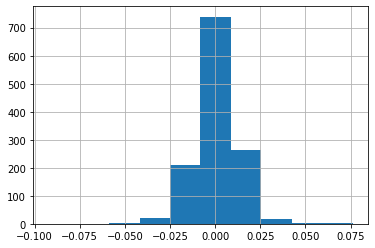

In [14]:
df['Return'].hist()

In [15]:
series = df['Return'].values[1:].reshape(-1, 1)

# Normalize
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [16]:
# Build the dataset
# Use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the dat should be N X T X D
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(1248, 10, 1) (1248,)


### Autoregressive Model

In [17]:
# Autoregressive RNN 
i = layers.Input(shape=(T, 1))
x = layers.LSTM(5)(i)
x = layers.Dense(1)(x)
model = tf.keras.Model(i, x)
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
20/20 [==============================] - 2s 32ms/step - loss: 1.0114 - val_loss: 1.1466
Epoch 2/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9975 - val_loss: 1.1884
Epoch 3/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9910 - val_loss: 1.2076
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9883 - val_loss: 1.1777
Epoch 5/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9869 - val_loss: 1.1450
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 1.0061 - val_loss: 1.2156
Epoch 7/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9963 - val_loss: 1.2430
Epoch 8/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9966 - val_loss: 1.1877
Epoch 9/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9825 - val_loss: 1.2713
Epoch 10/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9951 - val_loss: 1.1708
Epoch 11/80
20/20

### Better Model - Up/Down

In [18]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [19]:
# Create the Data
T = 10 # the number of time steps to lat at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T # (e.g if T=10 and you have 11 data points then you only have 1 sample)

In [20]:
# Normalize inputs
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [21]:
# Set up X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [22]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  X_train[u, :, :] = input_data[t:t+T]
  Y_train[u] = (targets[t+T] > 0)

In [23]:
# make the RNN 
i = layers.Input(shape=(T, D))
x = layers.LSTM(50)(i)
x = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(i, x)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

r = model.fit(X_train, Y_train,
              batch_size=32,
              epochs=300,
              validation_data=(X_test, Y_test))

Epoch 1/300
27/27 [==============================] - 3s 27ms/step - loss: 0.5881 - accuracy: 0.6841 - val_loss: 0.6218 - val_accuracy: 1.0000
Epoch 2/300
27/27 [==============================] - 0s 8ms/step - loss: 0.5529 - accuracy: 0.7414 - val_loss: 0.6486 - val_accuracy: 1.0000
Epoch 3/300
27/27 [==============================] - 0s 10ms/step - loss: 0.5424 - accuracy: 0.7390 - val_loss: 0.6524 - val_accuracy: 1.0000
Epoch 4/300
27/27 [==============================] - 0s 9ms/step - loss: 0.5310 - accuracy: 0.7378 - val_loss: 0.6735 - val_accuracy: 1.0000
Epoch 5/300
27/27 [==============================] - 0s 9ms/step - loss: 0.5210 - accuracy: 0.7402 - val_loss: 0.6797 - val_accuracy: 1.0000
Epoch 6/300
27/27 [==============================] - 0s 9ms/step - loss: 0.4956 - accuracy: 0.7414 - val_loss: 0.7049 - val_accuracy: 0.0000e+00
Epoch 7/300
27/27 [==============================] - 0s 9ms/step - loss: 0.4676 - accuracy: 0.7390 - val_loss: 0.7433 - val_accuracy: 0.0000e+00
Epo